# Get the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-11-04 14:57:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 74.125.143.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  26.1MB/s    in 4.4s    

2024-11-04 14:57:56 (24.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls -l

total 106980
-rw-r--r-- 1 root root 109540975 Dec  6  2021 pizza_steak.zip
drwxr-xr-x 1 root root      4096 Sep 20 13:22 sample_data


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls -l

total 106984
drwxr-xr-x 4 root root      4096 Nov  4 14:57 pizza_steak
-rw-r--r-- 1 root root 109540975 Dec  6  2021 pizza_steak.zip
drwxr-xr-x 1 root root      4096 Sep 20 13:22 sample_data


# Become one with the data

In [ ]:
# Get to know how many images are there for each class
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
labels = os.listdir("pizza_steak/train")

In [ ]:
labels

['pizza', 'steak']

# Preprocessing the data

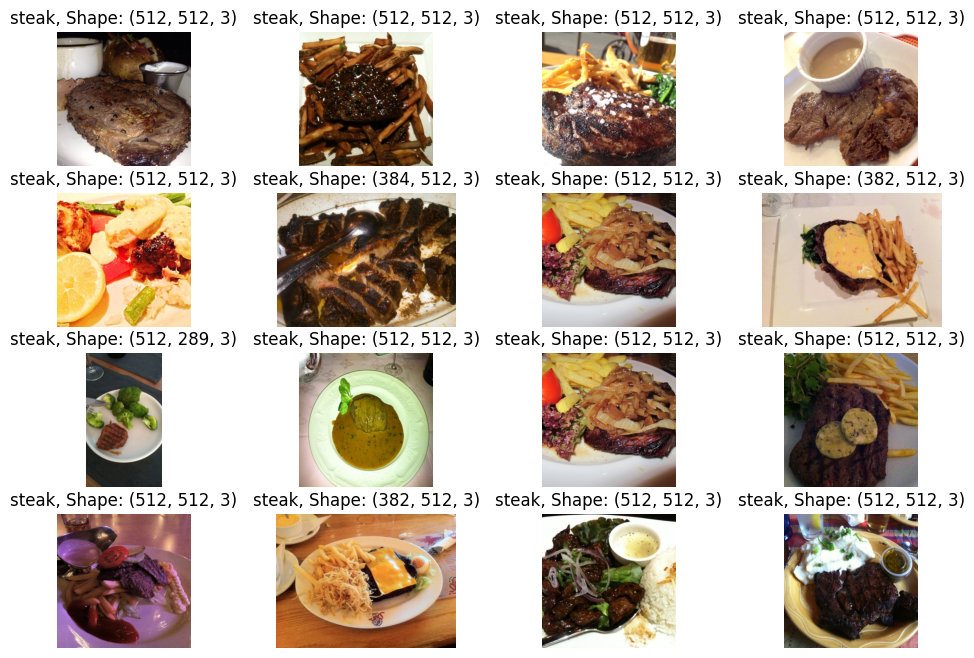

In [ ]:
import cv2
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i in range(16):
  rand_img_path = random.choice(os.listdir("pizza_steak/train/steak"))
  raw_img = cv2.cvtColor(cv2.imread(f"pizza_steak/train/steak/{rand_img_path}"), cv2.COLOR_BGR2RGB)
  plt.subplot(4, 4, i+1)
  plt.imshow(raw_img)
  plt.title(f"steak, Shape: {raw_img.shape}")
  plt.axis("off")
  print(f"")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                  target_size=IMAGE_SHAPE,
                                  batch_size=BATCH_SIZE,
                                  class_mode="binary")

test_data = test_datagen.flow_from_directory(test_dir,
                                  target_size=IMAGE_SHAPE,
                                  batch_size=BATCH_SIZE,
                                  class_mode="binary")

len(train_data), len(test_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(47, 16)

In [ ]:
1500/32, 500/32

(46.875, 15.625)

In [ ]:
len(train_data[0][0]), len(train_data[0][1])

(32, 32)

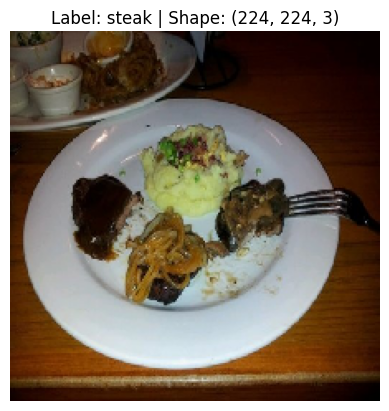

In [ ]:
import tensorflow as tf

rand_batch_size = random.randint(0, len(train_data)-1)
rand_img_index = random.randint(0, BATCH_SIZE-1)
plt.imshow(train_data[rand_batch_size][0][rand_img_index])
plt.title(f"Label: {labels[tf.cast(train_data[rand_batch_size][1][rand_img_index], tf.int32)]} | Shape: {train_data[rand_batch_size][0][rand_img_index].shape}")
plt.axis("off")
plt.show()

In [ ]:
# Build a model


# Set the random seed
tf.random.set_seed(42)

# Create a model by using Sequential API
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, input_shape=(224, 224, 3), activation="relu"),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_0.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
history_0 = model_0.fit(train_data,
                        epochs=10,
                        validation_data = test_data,
                        validation_steps = int(len(test_data) * 0.2))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.5995 - loss: 0.7506 - val_accuracy: 0.7500 - val_loss: 0.4874
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.7293 - loss: 0.5648 - val_accuracy: 0.8229 - val_loss: 0.5164
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.7653 - loss: 0.4881 - val_accuracy: 0.8646 - val_loss: 0.4066
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.7987 - loss: 0.4343 - val_accuracy: 0.8021 - val_loss: 0.4679
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.8360 - loss: 0.3656 - val_accuracy: 0.8646 - val_loss: 0.3376
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.8511 - loss: 0.3559 - val_accuracy: 0.8000 - val_loss: 0.3703
Epoch 7/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.8782 - loss: 0.2908 - val_accuracy: 0.8438 - val_loss: 0.3956
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - accuracy: 0.9048 - loss: 0.2613 - val_accuracy: 0.8646 - val_loss: 0.2870
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 219s 3s/step - accuracy: 0.9482 - loss: 0.1564 - val_accuracy: 0.7604 - val_loss: 0.7293
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 267s 5s/step - accuracy: 0.9573 - loss: 0.1250 - val_accuracy: 0.7188 - val_loss: 0.8373


<Axes: >

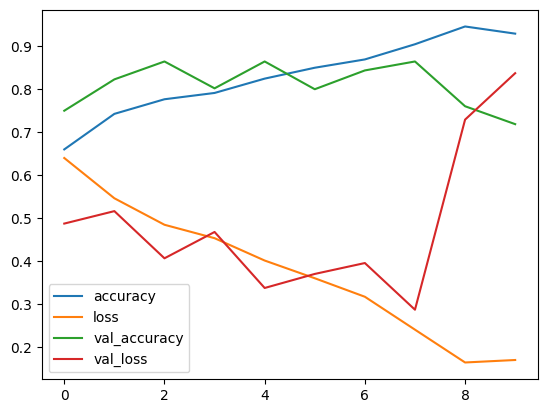

In [ ]:
import pandas as pd

pd.DataFrame(history_0.history).plot()

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(10, 7))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="Training Loss")
  plt.plot(epochs, val_loss, label="Validation Loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, acc, label="Training Accuracy")
  plt.plot(epochs, val_acc, label="Validation Accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

  plt.show()

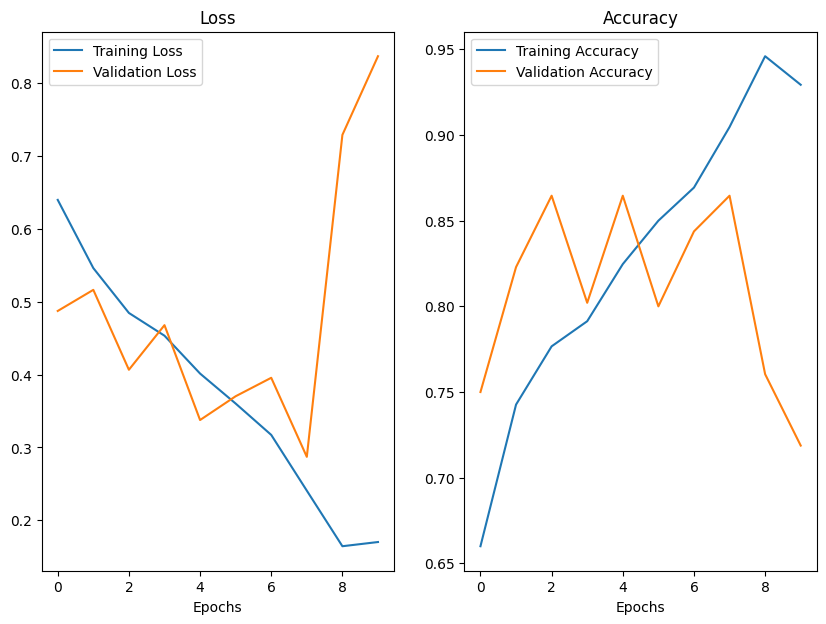

In [ ]:
plot_loss_curves(history_0)

In [ ]:
model_0.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 916ms/step - accuracy: 0.7998 - loss: 0.5745


[0.5892800688743591, 0.7860000133514404]

Random Img for testing our model  1972463.jpg


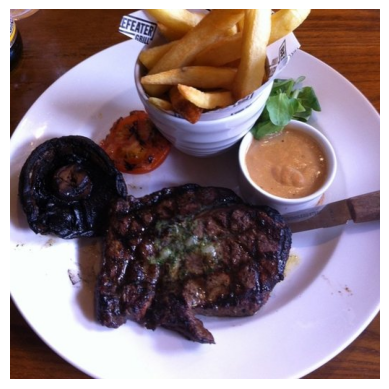

In [ ]:
test_img = random.choice(os.listdir("pizza_steak/test/steak"))
print("Random Img for testing our model ", test_img)
img = plt.imread(f"pizza_steak/test/steak/{test_img}")
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

Random Img for testing our model  373847.jpg


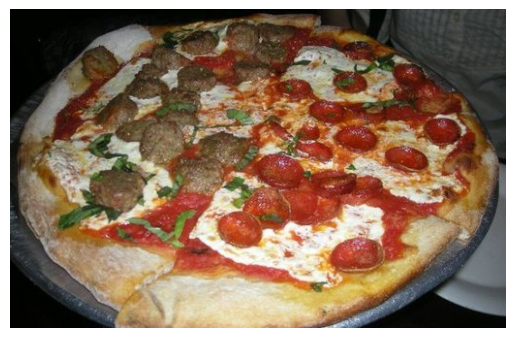

(224, 224, 3)
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


(array([[0.08936328]], dtype=float32), 'pizza')

In [ ]:
# ipython-input-23-9ad566179742
import random
import os
import matplotlib.pyplot as plt

test_img_path = random.choice(os.listdir("pizza_steak/test/pizza")) # Store the chosen file path
print("Random Img for testing our model ", test_img_path)

img = plt.imread(f"pizza_steak/test/pizza/{test_img_path}")
plt.imshow(img)
plt.axis("off")
plt.show()

# ipython-input-28-9ad566179742
import tensorflow as tf

test_img = load_and_prep_image(f"pizza_steak/test/pizza/{test_img_path}") # Use the stored file path
print(test_img.shape)
test_img = tf.expand_dims(test_img, axis=0)
print(test_img.shape)
y_pred = model_0.predict(test_img)
y_pred, labels[int(tf.round(y_pred))]

In [ ]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_aug = ImageDataGenerator(rescale = 1 / 255.,
                                       rotation_range = 20,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True
                                       )

test_datagen_aug = ImageDataGenerator(rescale = 1 / 255.,
                                      rotation_range = 20,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True)

In [ ]:
BATCH_SIZE = 32
SEED = 42

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size = (224, 224),
                                                       class_mode = "binary",
                                                       batch_size = BATCH_SIZE,
                                                       seed = SEED)

test_data_aug = test_datagen_aug.flow_from_directory(test_dir,
                                                     target_size = (224, 224),
                                                     class_mode = "binary",
                                                     batch_size = BATCH_SIZE,
                                                     seed = SEED)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


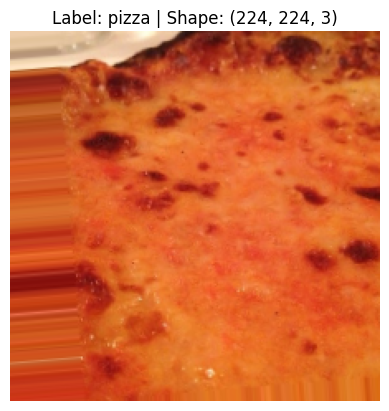

In [ ]:
# Visualizing the augmented images
import matplotlib.pyplot as plt

rand_batch_size = random.randint(0, len(train_data_aug)-1)
rand_img_index = random.randint(0, BATCH_SIZE-1)
plt.imshow(train_data_aug[rand_batch_size][0][rand_img_index])
plt.title(f"Label: {labels[tf.cast(train_data_aug[rand_batch_size][1][rand_img_index], tf.int32)]} | Shape: {train_data_aug[rand_batch_size][0][rand_img_index].shape}")
plt.axis("off")
plt.show()

In [ ]:
# Clone the model_0
model_1 = tf.keras.models.clone_model(model_0)
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 89888)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          89,889 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,169 (410.82 KB)

 Trainable params: 105,169 (410.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 89888)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          89,889 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,509 (1.20 MB)

 Trainable params: 105,169 (410.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 210,340 (821.64 KB)

In [ ]:
# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
train_data.class_indices, train_data_aug.class_indices

({'pizza': 0, 'steak': 1}, {'pizza': 0, 'steak': 1})

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data_aug,
                        epochs = 10,
                        validation_data = test_data_aug,
                        validation_steps = int(len(test_data_aug) * 0.2))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.4779 - loss: 0.7765 - val_accuracy: 0.6875 - val_loss: 0.6318
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.6776 - loss: 0.5829 - val_accuracy: 0.8333 - val_loss: 0.4291
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.7829 - loss: 0.4896 - val_accuracy: 0.8438 - val_loss: 0.4225
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.7702 - loss: 0.5038 - val_accuracy: 0.8229 - val_loss: 0.3715
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.7967 - loss: 0.4456 - val_accuracy: 0.8750 - val_loss: 0.3280
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.8063 - loss: 0.4361 - val_accuracy: 0.7000 - val_loss: 0.4963
Epoch 7/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.7765 - loss: 0.4917 - val_accuracy: 0.8021 - val_loss: 0.4080
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.7972 - loss: 0.4476 - val_accuracy: 0.8854 - val_loss: 0.2928
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.8026 - loss: 0.4428 - val_accuracy: 0.8125 - val_loss: 0.4707
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.8241 - loss: 0.4035 - val_accuracy: 0.8646 - val_loss: 0.3249


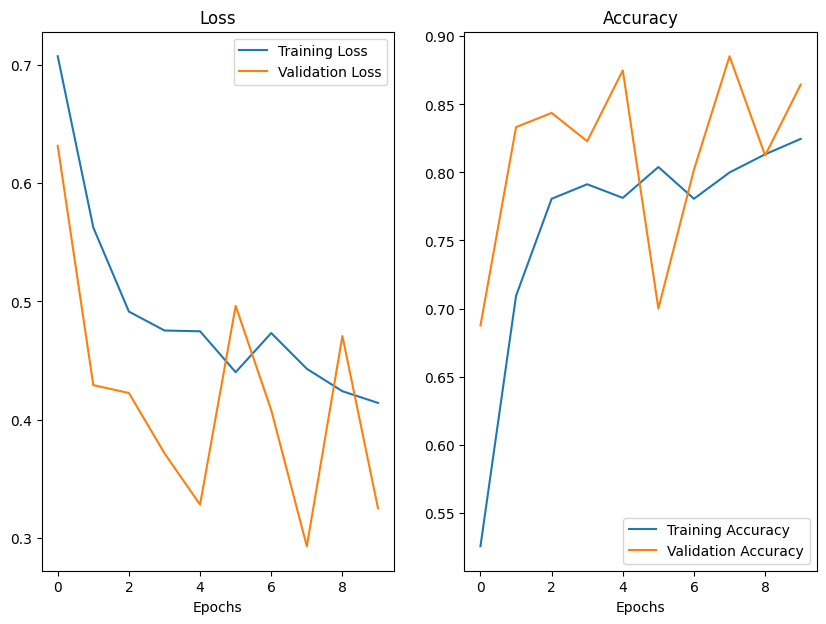

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.evaluate(test_data_aug)

16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7876 - loss: 0.4670


[0.43883031606674194, 0.8059999942779541]

In [ ]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 920ms/step - accuracy: 0.8817 - loss: 0.3287


[0.3115251362323761, 0.8880000114440918]

Random Img for testing our model  648055.jpg


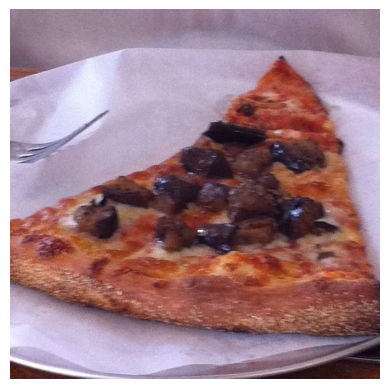

(224, 224, 3)
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


(array([[0.9635478]], dtype=float32), 'steak')

In [ ]:
test_img_path = random.choice(os.listdir("pizza_steak/test/pizza")) # Store the chosen file path
print("Random Img for testing our model ", test_img_path)

img = plt.imread(f"pizza_steak/test/pizza/{test_img_path}")
plt.imshow(img)
plt.axis("off")
plt.show()

# ipython-input-28-9ad566179742
import tensorflow as tf

test_img = load_and_prep_image(f"pizza_steak/test/pizza/{test_img_path}") # Use the stored file path
print(test_img.shape)
test_img = tf.expand_dims(test_img, axis=0)
print(test_img.shape)
y_pred = model_0.predict(test_img)
y_pred, labels[int(tf.round(y_pred))]

Random Img for testing our model  1523026.jpg


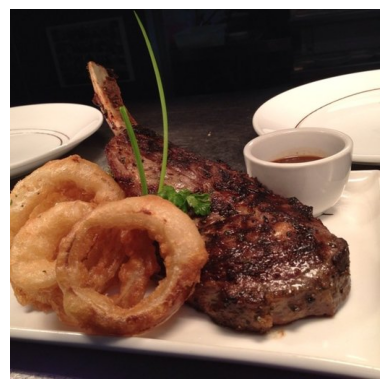

(224, 224, 3)
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


(array([[0.9995164]], dtype=float32), 'steak')

In [ ]:
test_img_path = random.choice(os.listdir("pizza_steak/test/steak")) # Store the chosen file path
print("Random Img for testing our model ", test_img_path)

img = plt.imread(f"pizza_steak/test/steak/{test_img_path}")
plt.imshow(img)
plt.axis("off")
plt.show()

# ipython-input-28-9ad566179742
import tensorflow as tf

test_img = load_and_prep_image(f"pizza_steak/test/steak/{test_img_path}") # Use the stored file path
print(test_img.shape)
test_img = tf.expand_dims(test_img, axis=0)
print(test_img.shape)
y_pred = model_0.predict(test_img)
y_pred, labels[int(tf.round(y_pred))]

In [ ]:
# model_1 is trained with the Augmented data
model_1_metrics_aug = model_1.evaluate(test_data_aug)

16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7727 - loss: 0.4757


In [ ]:
model_1_metrics = model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 917ms/step - accuracy: 0.8676 - loss: 0.3520


In [ ]:
model_0_metrics_aug = model_0.evaluate(train_data_aug)

47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7216 - loss: 0.6498


In [ ]:
model_0_metrics = model_0.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 919ms/step - accuracy: 0.7508 - loss: 0.6444


<Axes: >

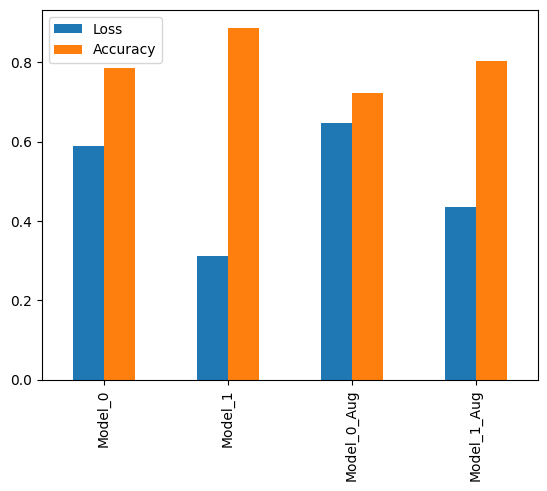

In [ ]:
# Visualizing the metrics
import pandas as pd

evaluation_metrics = pd.DataFrame({
    "Model_0": model_0_metrics,
    "Model_1": model_1_metrics,
    "Model_0_Aug": model_0_metrics_aug,
    "Model_1_Aug": model_1_metrics_aug,
}, index=["Loss", "Accuracy"])

evaluation_metrics.T.plot(kind="bar")